In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import pandas as pd
import glob

# Set up the base directory
base_dir = "/home/parth/snaak/snaak_data/data_parth/"
print(f"Base directory: {base_dir}")


Base directory: /home/parth/snaak/snaak_data/data_parth/


In [45]:
# Write a function to iterate through all directories in base dir and find all .npz files
# Add them to a dictionary with the key as a string of the directory path and the value as a list of .npz files
def load_npz_files_as_dict(directory):
    """
    Recursively find all .npz files in the given directory and subdirectories,
    and load them into a dictionary where the key is the full file path and the value is the loaded npz file.

    Args:
        directory (str): Base directory to search

    Returns:
        dict: Dictionary mapping file paths to loaded npz file objects
    """
    npz_dict = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.npz'):
                file_path = os.path.join(root, file)
                try:
                    npz_dict[file_path] = np.load(file_path)
                except Exception as e:
                    print(f"Failed to load {file_path}: {e}")
    return npz_dict

In [46]:
npz_dict = load_npz_files_as_dict(base_dir)

In [ ]:
import pandas as pd

def create_dataframe_from_npz_dict(npz_dict):
    """
    Parse the npz dictionary and create a DataFrame with session info and action data.

    Args:
        npz_dict (dict): Dictionary mapping file paths to loaded npz file objects

    Returns:
        pd.DataFrame: DataFrame with columns: Session_name, Episode_name, Action, Path
    """
    data = []

    for file_path, npz_file in npz_dict.items():
        # Extract session name (subdirectory name)
        session_name = os.path.basename(os.path.dirname(file_path))

        # Extract episode name (filename without extension)
        episode_name = os.path.splitext(os.path.basename(file_path))[0]

        # Extract action (a1 data as tuple)
        try:
            a1_data = npz_file['a1']
            # Convert to tuple of 3 elements (x, y, z)
            action = tuple(a1_data[:3]) if len(a1_data) >= 3 else tuple(a1_data)
        except KeyError:
            # If 'a1' key doesn't exist, use None
            action = None

        # Add row to data list
        data.append({
            'Session_name': session_name,
            'Episode_name': episode_name,
            'Action': action,
            'Path': file_path
        })

    return pd.DataFrame(data)

# Create the DataFrame
df = create_dataframe_from_npz_dict(npz_dict)
print(f"Created DataFrame with {len(df)} rows")
print("\nFirst few rows:")
print(df.head())


Created DataFrame with 32 rows

First few rows:
     Session_name Episode_name  \
0  10_05_22_01_57            1   
1  10_05_22_01_57            3   
2  10_05_22_01_57            4   
3  10_05_22_01_57            5   
4  10_05_22_01_57            0   

                                              Action  \
0  (0.0025312930002929866, -0.025278807934964932,...   
1  (0.005146646959948469, 0.04766633611746096, -0...   
2  (0.000115595594183171, -0.01451107360093766, -...   
3  (0.00047211512421498937, -0.011993191046720274...   
4  (0.004566200913739733, 0.05567013690897861, -0...   

                                                Path  
0  /home/parth/snaak/snaak_data/data_parth/10_05_...  
1  /home/parth/snaak/snaak_data/data_parth/10_05_...  
2  /home/parth/snaak/snaak_data/data_parth/10_05_...  
3  /home/parth/snaak/snaak_data/data_parth/10_05_...  
4  /home/parth/snaak/snaak_data/data_parth/10_05_...  


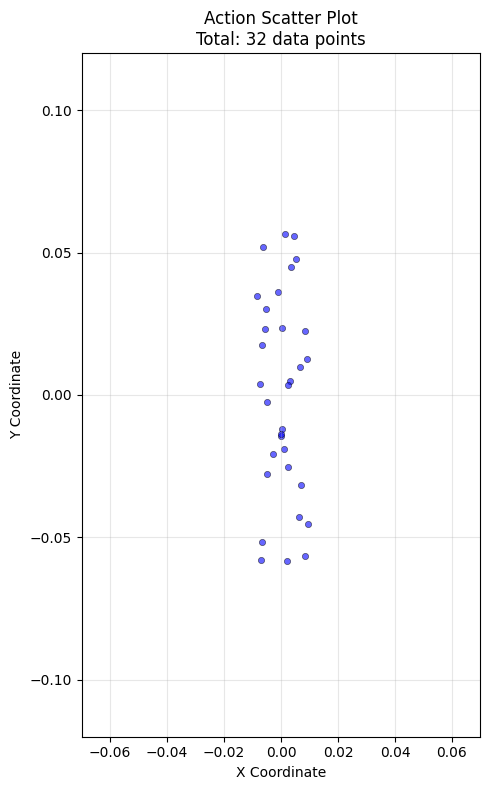

Plotted 32 data points
X range: -0.0083 to 0.0095
Y range: -0.0584 to 0.0565


In [48]:
def plot_actions_scatter(df):
    """
    Create a scatter plot of x and y values from the Action column of the DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame with Action column containing (x, y, z) tuples
    """
    # Extract x and y coordinates from the Action column
    x_coords = []
    y_coords = []
    
    for action in df['Action']:
        if action is not None and len(action) >= 2:
            x_coords.append(action[0])  # x coordinate
            y_coords.append(action[1])  # y coordinate
    
    if not x_coords:
        print("No valid action data found to plot")
        return
    
    # Create the scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(x_coords, y_coords, alpha=0.6, s=20, c='blue', edgecolors='black', linewidth=0.5)
    
    # Set axis labels and title
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Action Scatter Plot\nTotal: {len(x_coords)} data points')
    plt.grid(True, alpha=0.3)
    
    # Set specific axis ranges
    plt.xlim(-0.07, 0.07)
    plt.ylim(-0.12, 0.12)
    
    # Set aspect ratio to maintain rectangular shape (not square)
    # This ensures the plot represents the actual coordinate proportions
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Plotted {len(x_coords)} data points")
    print(f"X range: {min(x_coords):.4f} to {max(x_coords):.4f}")
    print(f"Y range: {min(y_coords):.4f} to {max(y_coords):.4f}")

# Create the scatter plot
plot_actions_scatter(df)
